# Reducing the number of high fatality accidents

## 📖 Background
You work for the road safety team within the department of transport and are looking into how they can reduce the number of serious accidents. The safety team classes serious accidents as fatal accidents involving 3+ casualties. They are trying to learn more about the characteristics of these serious accidents so they can brainstorm interventions that could lower the number of deaths. They have asked for your assistance with answering a number of questions.

## 💾 The data
The reporting department have been collecting data on every accident that is reported. They've included this along with a lookup file for 2020's accidents.

*Published by the department for transport. https://data.gov.uk/dataset/road-accidents-safety-data* 
*Contains public sector information licensed under the Open Government Licence v3.0.*

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import pandas as pd
accidents = pd.read_csv(r'./data/accident-data.csv')

In [14]:
accidents.nunique()

accident_index                             91199
accident_year                                  1
accident_reference                         91199
longitude                                  89589
latitude                                   88748
accident_severity                              3
number_of_vehicles                            13
number_of_casualties                          16
date                                         366
day_of_week                                    7
time                                        1438
first_road_class                               6
first_road_number                           3068
road_type                                      6
speed_limit                                    7
junction_detail                               11
junction_control                               6
second_road_class                              6
second_road_number                          2274
pedestrian_crossing_human_control              5
pedestrian_crossing_

In [25]:
accidents=accidents.drop(columns=['accidents_index','number_of_vehicles','number_of_casualties','junction_control','accident_year','accident_reference','first_road_number','second_road_number'])

In [26]:
index=(  ((accidents==99)|(accidents==-1)).sum(axis=1)==0)
accidents=accidents[index]

In [27]:
#df=accidents.drop(accidents[((accidents==99)|(accidents==-1))].index)
accidents['time']=pd.to_datetime(accidents.time).dt.hour

In [38]:
accidents['date'] = pd.to_datetime(accidents['date']).dt.month

In [115]:
variables = pd.DataFrame(columns=['Variable','Number of unique values','Values'])
df=accidents
for i, var in enumerate(df.columns):
    variables.loc[i] = [var, df[var].nunique(), df[var].unique().tolist()]
variables    

,Variable,Number of unique values,Values
0,accident_index,89218,"[2020010219808, 2020010220496, 2020010228005, ..."
1,longitude,87723,"[-0.254001, -0.139253, -0.178719, -0.001683, -..."
2,latitude,86947,"[51.462262, 51.470327, 51.529614, 51.54121, 51..."
3,accident_severity,3,"[3, 2, 1]"
4,number_of_vehicles,13,"[1, 2, 3, 4, 8, 6, 7, 5, 9, 10, 11, 13, 12]"
5,number_of_casualties,16,"[1, 2, 4, 3, 6, 5, 9, 11, 7, 8, 10, 17, 41, 13..."
6,date,12,"[4, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12]"
7,day_of_week,7,"[3, 2, 4, 5, 6, 7, 1]"
8,time,24,"[9, 13, 1, 2, 3, 4, 5, 10, 8, 14, 16, 15, 19, ..."
9,first_road_class,6,"[6, 3, 5, 4, 1, 2]"


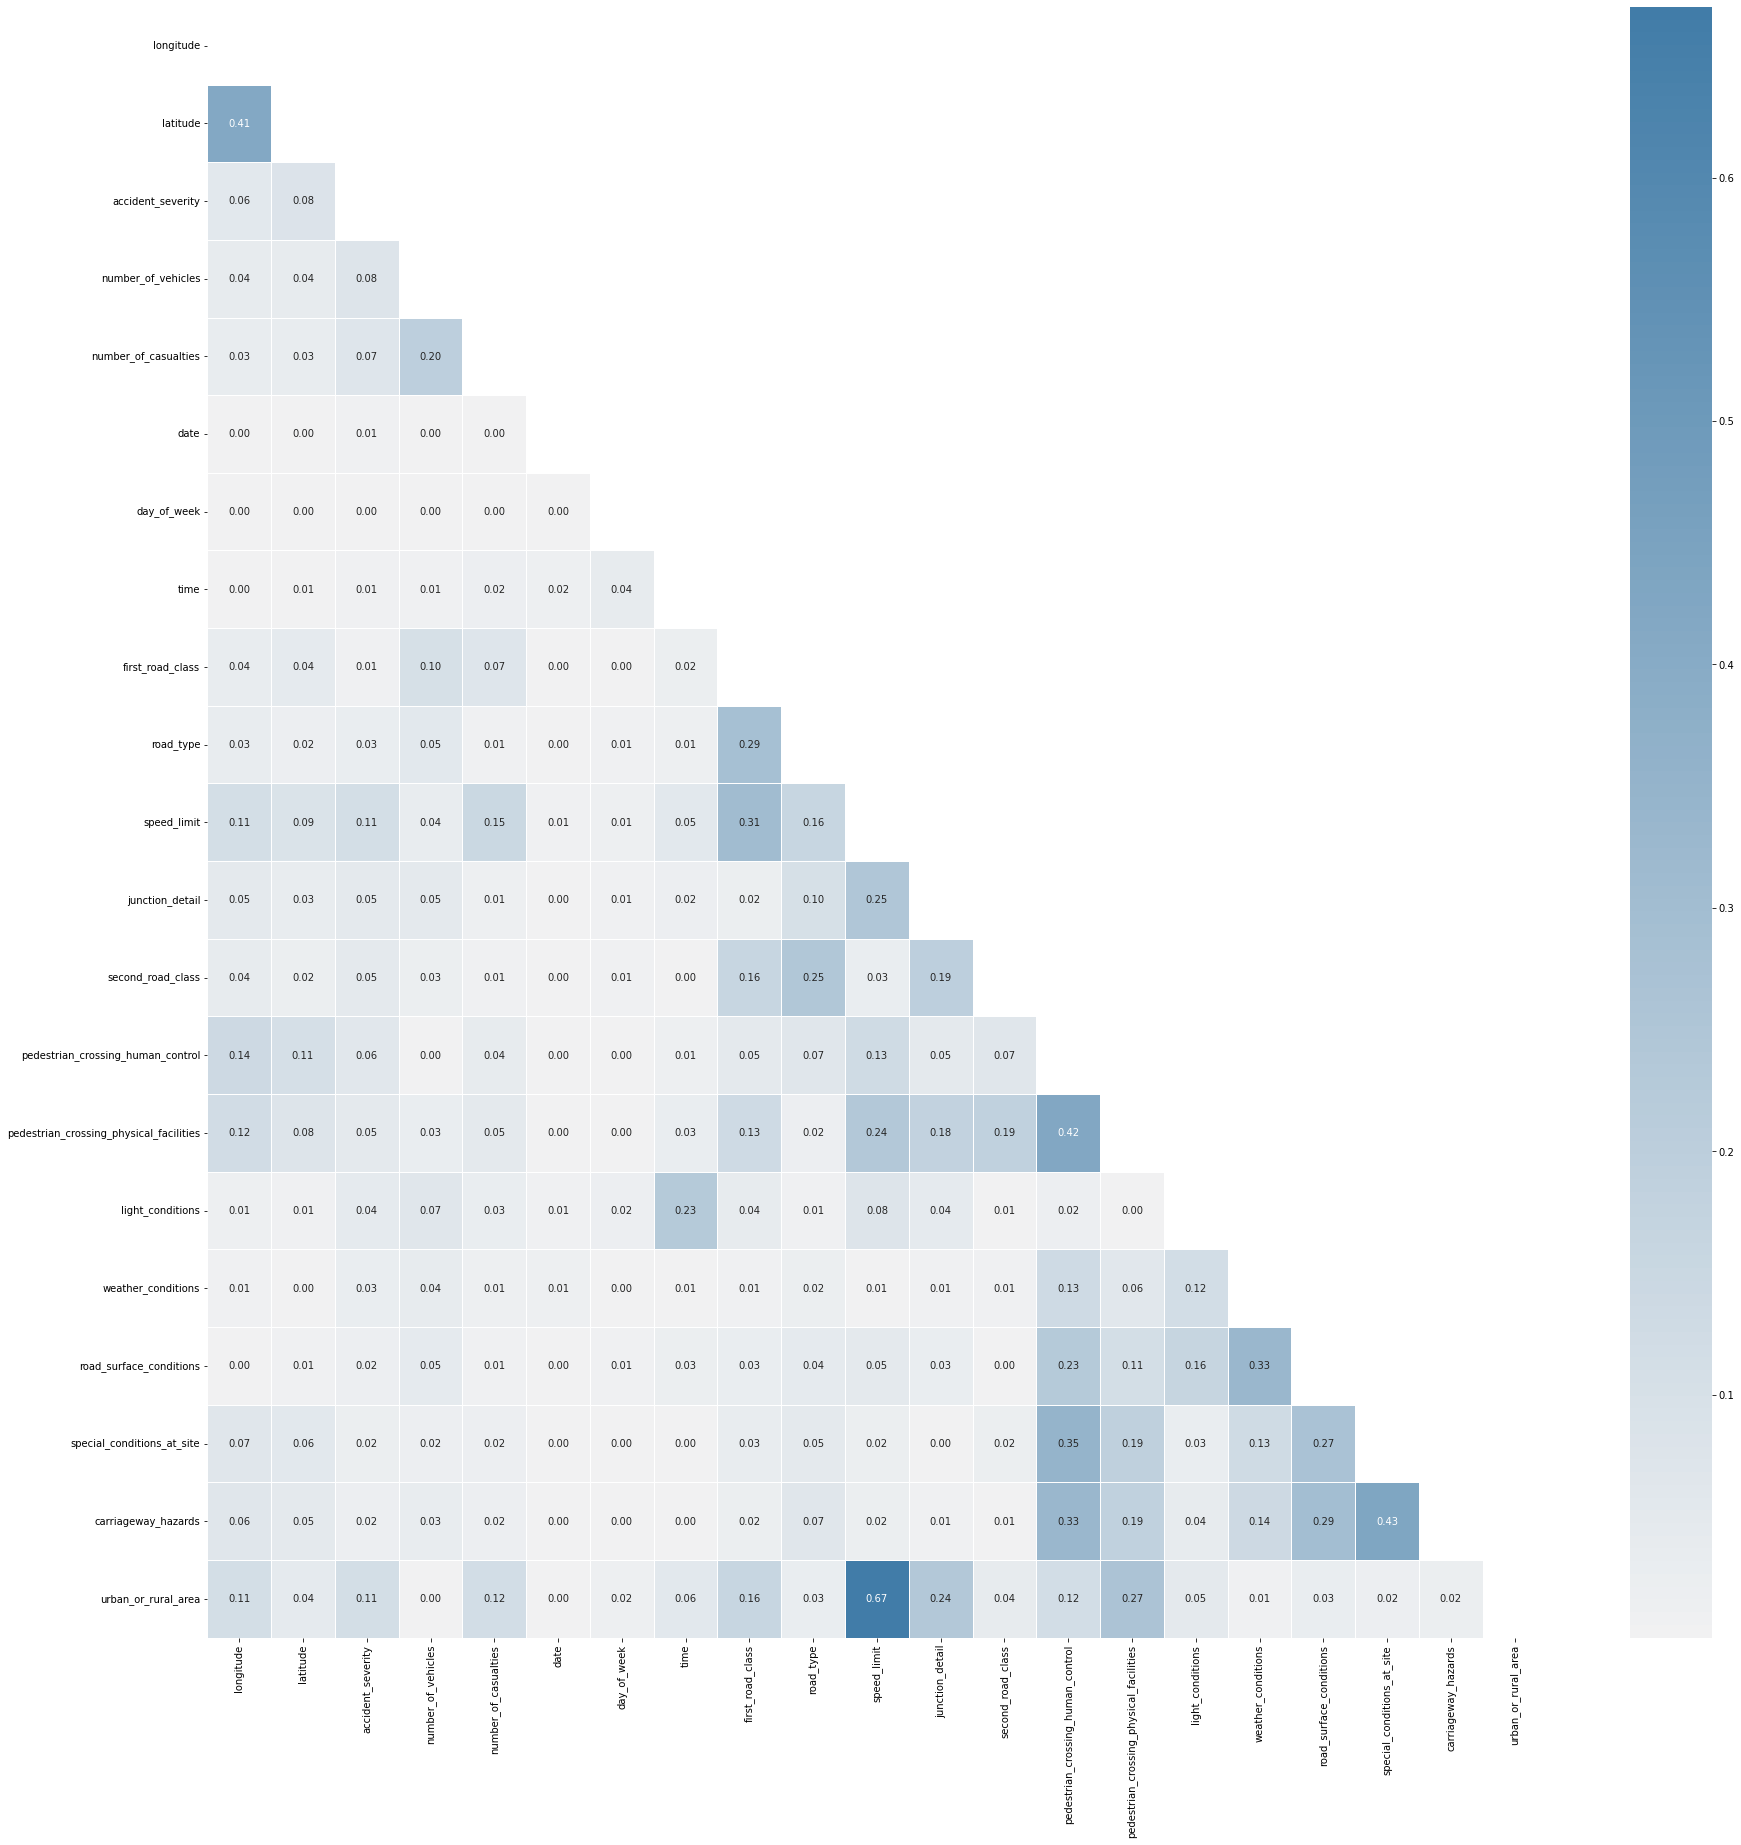

In [39]:
# Visualizing the correlation matrix
corr = accidents.corr().abs()
# Generate a mask for the upper triangle 
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
# Add the mask to the heatmap
f, ax = plt.subplots(figsize=(30, 30))
ax=sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=1, annot=True, fmt=".2f")
plt.show()

#### info

first_road_number

In [67]:
accidents.first_road_number.nunique()
(accidents.first_road_number.value_counts()>300).sum()

3068

road_type

6
6    66929
3    13206
1     5580
9     2006
2     1966
7     1512
Name: road_type, dtype: int64


<AxesSubplot:xlabel='road_type', ylabel='count'>

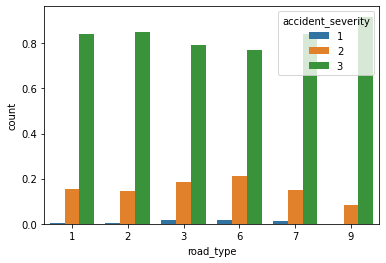

In [81]:
print(accidents.road_type.nunique())
print(accidents.road_type.value_counts())
road_type_severity=(accidents.groupby('road_type')['accident_severity'].value_counts(normalize=True)).reset_index(name='count')
sns.barplot(x='road_type',y='count',data=road_type_severity,hue='accident_severity')


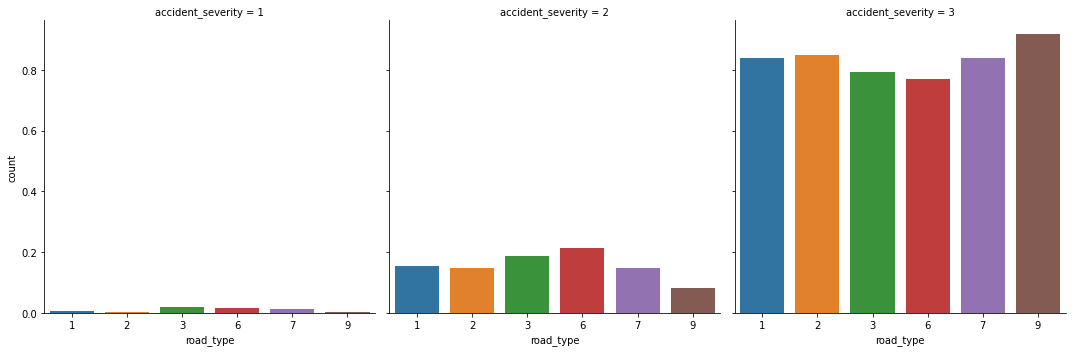

In [82]:
sns.catplot(x='road_type',y='count',data=road_type_severity,col='accident_severity', kind="bar")

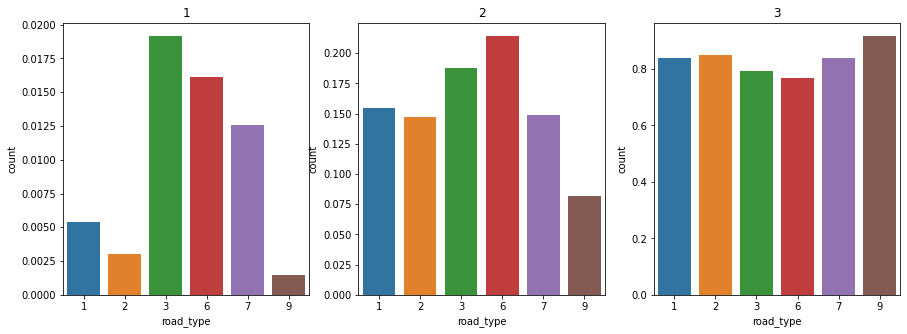

In [94]:
print(accidents.road_type.nunique())
print(accidents.road_type.value_counts())
road_type_severity=(accidents.groupby('road_type')['accident_severity'].value_counts(normalize=True)).reset_index(name='count')
sns.barplot(x='road_type',y='count',data=road_type_severity,hue='accident_severity')

fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))
for i in range(3):
    sns.barplot(ax=axes[i],x='road_type',y='count',data=road_type_severity[road_type_severity.accident_severity==(i+1)])
    axes[i].set_title(i+1)

In [62]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   accident_index                           91199 non-null  object 
 1   accident_year                            91199 non-null  int64  
 2   accident_reference                       91199 non-null  object 
 3   longitude                                91185 non-null  float64
 4   latitude                                 91185 non-null  float64
 5   accident_severity                        91199 non-null  int64  
 6   number_of_vehicles                       91199 non-null  int64  
 7   number_of_casualties                     91199 non-null  int64  
 8   date                                     91199 non-null  object 
 9   day_of_week                              91199 non-null  int64  
 10  time                                     91199

### relationship

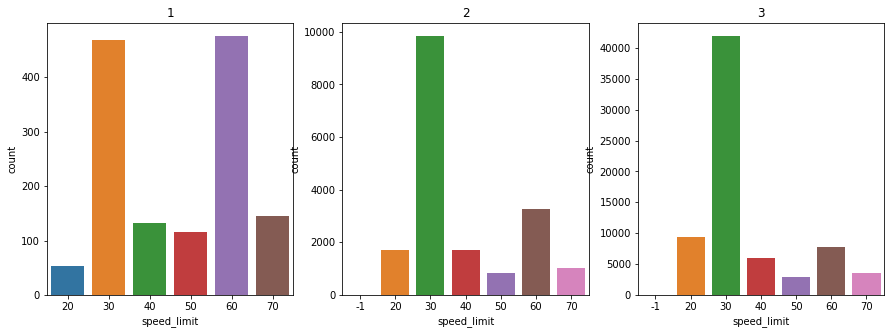

In [123]:
df=pd.DataFrame()
n=accidents.speed_limit.nunique()
print(accidents.speed_limit.value_counts())
df=(accidents.groupby('speed_limit')['accident_severity'].value_counts()).reset_index(name='count')
speed_limits=[20,30,40,50,60,70]
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))

for i in range(3):
    sns.barplot(ax=axes[i],x='speed_limit',y='count',data=df[df.accident_severity==(i+1)])
    axes[i].set_title(i+1)

In [9]:
df=pd.DataFrame()
n=accidents.date.nunique()
print(accidents.date.value_counts())

1    89218
Name: date, dtype: int64


In [ ]:

df=(accidents.groupby('speed_limit')['accident_severity'].value_counts()).reset_index(name='count')
speed_limits=[20,30,40,50,60,70]
fig,axes=plt.subplots(1,3,sharey=False,figsize=(15,5))

for i in range(3):
    sns.barplot(ax=axes[i],x='speed_limit',y='count',data=df[df.accident_severity==(i+1)])
    axes[i].set_title(i+1)

#### describe

In [2]:
accidents.describe()

,accident_year,longitude,latitude,accident_severity,number_of_vehicles,number_of_casualties,day_of_week,first_road_class,first_road_number,road_type,...,second_road_class,second_road_number,pedestrian_crossing_human_control,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area
count,91199.0,91185.000000,91185.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,...,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,2020.0,-1.189258,52.351073,2.768232,1.835272,1.267382,4.121558,4.220320,790.666071,5.256001,...,5.551771,220.231987,0.352975,1.185309,2.065308,1.702047,1.391583,0.244740,0.180594,1.323205
std,0.0,1.367786,1.327573,0.456682,0.677272,0.681473,1.932200,1.443475,1580.817743,1.684878,...,1.015113,913.692832,1.698116,2.445924,1.747690,1.845786,0.925690,1.318554,1.149791,0.468031
min,2020.0,-7.497375,49.970479,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,2020.0,-2.107789,51.457237,3.000000,1.000000,1.000000,2.000000,3.000000,0.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,2020.0,-1.046912,51.763385,3.000000,2.000000,1.000000,4.000000,4.000000,34.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,2020.0,-0.125238,53.297386,3.000000,2.000000,1.000000,6.000000,6.000000,538.000000,6.000000,...,6.000000,0.000000,0.000000,0.000000,4.000000,1.000000,2.000000,0.000000,0.000000,2.000000
max,2020.0,1.756257,60.541144,3.000000,13.000000,41.000000,7.000000,6.000000,9174.000000,9.000000,...,6.000000,9174.000000,9.000000,9.000000,7.000000,9.000000,9.000000,9.000000,9.000000,3.000000


#### relationship btw day_of_week and accident

In [ ]:
df=pd.DataFrame()
col='day_of_week'
n=accidents[col].nunique()
print(accidents[col].value_counts())
df=(accidents.groupby(col)['accident_severity'].value_counts()).reset_index(name='count')


In [15]:
accidents.groupby('day_of_week')['accident_severity'].value_counts()

day_of_week  accident_severity
1            3                     7810
             2                     2299
             1                      206
2            3                    10121
             2                     2462
             1                      189
3            3                    10531
             2                     2566
             1                      170
4            3                    10758
             2                     2624
             1                      182
5            3                    11026
             2                     2820
             1                      210
6            3                    11724
             2                     2960
             1                      205
7            3                     9483
             2                     2624
             1                      229
Name: accident_severity, dtype: int64

In [14]:
accidents.groupby('day_of_week')['accident_severity'].sum()

day_of_week
1    28234
2    35476
3    36895
4    37704
5    38928
6    41297
7    33926
Name: accident_severity, dtype: int64

#### location

<AxesSubplot:xlabel='latitude', ylabel='longitude'>

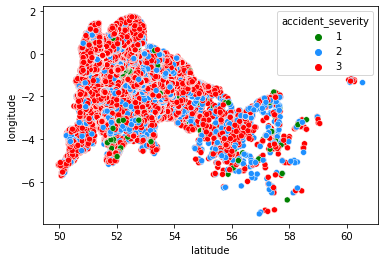

In [19]:
sns.scatterplot(x=accidents.latitude,y=accidents.longitude,hue=accidents.accident_severity,palette=['green','dodgerblue','red'], legend='full')

#### time vs casualties

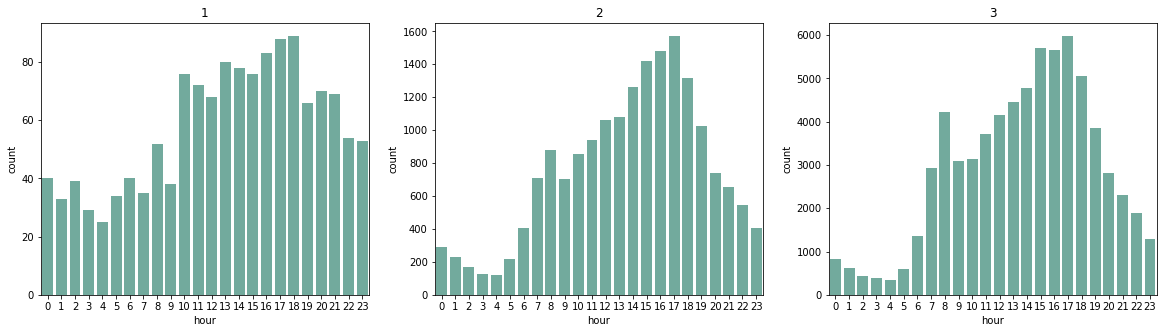

In [42]:
df=pd.DataFrame()
#df['hour']=pd.to_datetime(accidents.time).dt.hour
df[['accident_severity','hour']]=accidents[['accident_severity','time']]
date_severity_counts=df.groupby([pd.Grouper(key='hour'),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x='hour',y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(i+1)

month vs casual

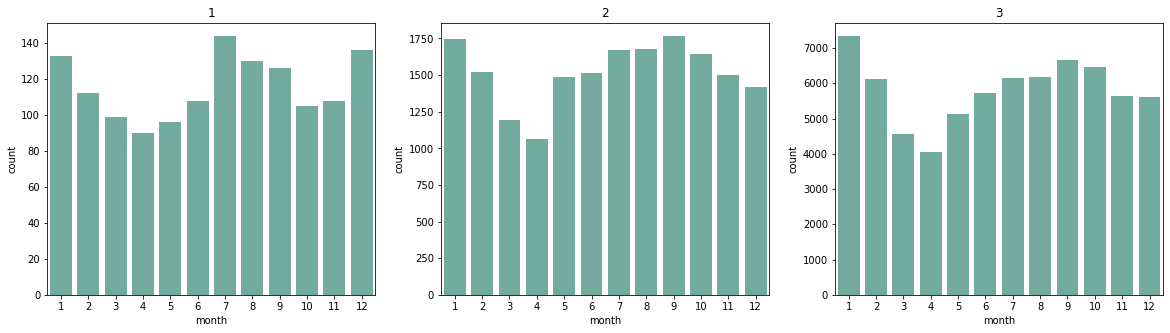

In [43]:
df=pd.DataFrame()
#df['hour']=pd.to_datetime(accidents.time).dt.hour
col='month'
df[['accident_severity',col]]=accidents[['accident_severity','date']]
date_severity_counts=df.groupby([pd.Grouper(key=col),df.accident_severity]).size().reset_index(name='count')
fig,axes=plt.subplots(1,3,sharey=False,figsize=(20,5))
df=date_severity_counts
for i in range(3):
    sns.barplot(ax=axes[i],x=col,y='count',data=df[df.accident_severity==(i+1)],ci=None, color='#69b3a2')
    axes[i].set_title(i+1)

#### 

In [3]:
lookup = pd.read_csv(r'./data/road-safety-lookups.csv')
lookup.head()

,table,field name,code/format,label,note
0,Accident,accident_index,NaN,NaN,unique value for each accident. The accident_i...
1,Accident,accident_year,NaN,NaN,NaN
2,Accident,accident_reference,NaN,NaN,In year id used by the police to reference a c...
3,Accident,longitude,NaN,NaN,Null if not known
4,Accident,Latitude,NaN,NaN,Null if not known


## 💪 Competition challenge

Create a report that covers the following:

1. What time of day and day of the week do most serious accidents happen?
2. Are there any patterns in the time of day/ day of the week when serious accidents occur?
3. What characteristics stand out in serious accidents compared with other accidents?
4. On what areas would you recommend the planning team focus their brainstorming efforts to reduce serious accidents?

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 30%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in depth enough but also concise.</li></ul> |
| **Visualizations** | 25% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |
| **Votes** | 10% | <ul><li>Up voting - most upvoted entries get the most points.</li></ul> |

## ✅ Checklist before publishing into the competition
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- Remove redundant cells like the judging criteria so the workbook is focused on your story.
- Make sure the workbook reads well and explains how you found your insights.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [119]:
df=accidents[(accidents.drop(columns='accident_index').columns)]

In [125]:
class_1=df[df.accident_severity==1]
class_2=df[(df.accident_severity==2)|(df.accident_severity==3)]
class_2_under=class_2.sample(class_1.shape[0])

In [127]:
df_under=pd.concat([class_1,class_2_under])

In [128]:
y=df_under.accident_severity
X=df_under.drop(columns=['accident_severity','longitude','latitude'])
X_cat=X.astype('category')
y_cat=y.replace(3,2).astype("category")
#split data to train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42)

Random forests should be able to handle categorical values natively so look for a different implementation so you don't have to encode all of those features and use up all your memory.

In [146]:
from sklearn.linear_model import LogisticRegression
clf_lgr= LogisticRegression(penalty='l2', C=0.1,random_state=0,max_iter=30).fit(X_train, y_train)
print(clf_lgr.score(X_test, y_test))
y_pred=clf_lgr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.6662665066026411
              precision    recall  f1-score   support

           1       0.67      0.66      0.66       414
           2       0.67      0.67      0.67       419

    accuracy                           0.67       833
   macro avg       0.67      0.67      0.67       833
weighted avg       0.67      0.67      0.67       833

[[273 141]
 [137 282]]


C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


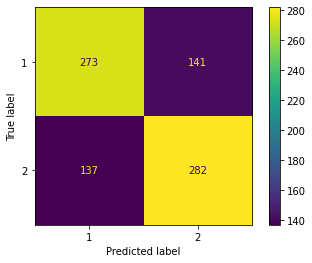

In [131]:
cm = confusion_matrix(y_test, y_pred, labels=clf_lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_lgr.classes_)
disp.plot()

In [132]:
clf_lgr.coef_

array([[ 0.35835051, -0.38665415,  0.01494218,  0.01865561,  0.03779511,
         0.1505335 , -0.06737702, -0.02802313,  0.04789031, -0.02297144,
         0.20636049, -0.04041523, -0.14851543,  0.06213358,  0.28850238,
         0.0742492 ,  0.10225959, -0.11527977]])

In [140]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

0.7228232869654817
0.6710684273709484


sample without imbalance resampling

In [166]:
y=df.accident_severity
X=df.drop(columns=['accident_severity','longitude','latitude'])
X_cat=X.astype('category')
y_cat=y.replace(3,2).astype("category")
#split data to train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_cat, y_cat, test_size=0.3, random_state=42)

0.7161324067847269
0.7023088993499216
              precision    recall  f1-score   support

           1       0.04      0.68      0.07       423
           2       0.99      0.70      0.82     26343

    accuracy                           0.70     26766
   macro avg       0.51      0.69      0.45     26766
weighted avg       0.98      0.70      0.81     26766



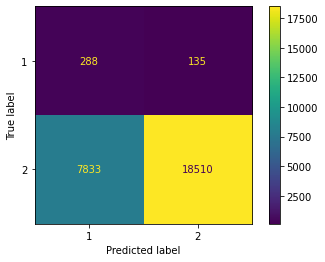

In [149]:
print(clf_rf.score(X_test, y_test))
print(clf_lgr.score(X_test, y_test))
y_pred=clf_lgr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf_lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_lgr.classes_)
disp.plot()

In [151]:
testx=X_test
testy=y_test

In [174]:
df=accidents[(accidents.drop(columns='accident_index').columns)]
class_1=df[df.accident_severity==1]
class_2=df[(df.accident_severity==2)|(df.accident_severity==3)]
class_2_under=class_2.sample(class_1.shape[0])
df_under=pd.concat([class_1,class_2_under])
y=df_under.accident_severity


In [175]:
X=df_under.drop(columns=['accident_severity'])
col=X.drop(columns=['longitude','latitude']).columns

X[col]=X[col].astype('category')

y_cat=y.replace(3,2).astype("category")
#split data to train/test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.3, random_state=42)

In [176]:
X.dtypes

longitude                                   float64
latitude                                    float64
number_of_vehicles                         category
number_of_casualties                       category
date                                       category
day_of_week                                category
time                                       category
first_road_class                           category
road_type                                  category
speed_limit                                category
junction_detail                            category
second_road_class                          category
pedestrian_crossing_human_control          category
pedestrian_crossing_physical_facilities    category
light_conditions                           category
weather_conditions                         category
road_surface_conditions                    category
special_conditions_at_site                 category
carriageway_hazards                        category
urban_or_rur

In [177]:
from sklearn.linear_model import LogisticRegression
clf_lgr= LogisticRegression(penalty='l2', C=0.1,random_state=0,max_iter=30).fit(X_train, y_train)
print(clf_lgr.score(X_test, y_test))
y_pred=clf_lgr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=5, random_state=0)
clf_rf.fit(X_train, y_train)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

C:\Users\zhe\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6986794717887155
              precision    recall  f1-score   support

           1       0.71      0.66      0.69       414
           2       0.69      0.74      0.71       419

    accuracy                           0.70       833
   macro avg       0.70      0.70      0.70       833
weighted avg       0.70      0.70      0.70       833

[[273 141]
 [110 309]]
0.7454920144255538
0.695078031212485


In [178]:
print(clf_rf.score(X_test, y_test))
print(clf_lgr.score(X_test, y_test))

0.695078031212485
0.6986794717887155


0.695078031212485
0.6986794717887155
              precision    recall  f1-score   support

           1       0.71      0.66      0.69       414
           2       0.69      0.74      0.71       419

    accuracy                           0.70       833
   macro avg       0.70      0.70      0.70       833
weighted avg       0.70      0.70      0.70       833



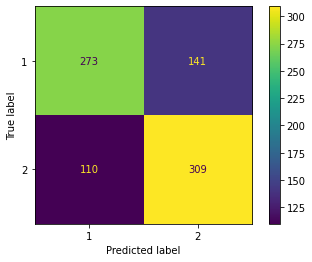

In [179]:
print(clf_rf.score(X_test, y_test))
print(clf_lgr.score(X_test, y_test))
y_pred=clf_lgr.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
print(classification_report(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred, labels=clf_lgr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf_lgr.classes_)
disp.plot()